In [1]:
import json
import os

# Path to the directory containing JSON files
directory = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON'

# This will store the count of each quantity
quantity_counts = {}

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):  # Ensure processing only JSON files
        filepath = os.path.join(directory, filename)
        try:
            with open(filepath, 'r') as file:
                data = json.load(file)
                # Adjusting key according to the likely JSON structure
                # If 'EXPECTED_QUANTITY' is deeply nested, you will need to adjust the access pattern
                quantity = data.get('EXPECTED_QUANTITY', 0)  # Use the correct path to 'EXPECTED_QUANTITY'
                if quantity in quantity_counts:
                    quantity_counts[quantity] += 1
                else:
                    quantity_counts[quantity] = 1
        except json.JSONDecodeError as e:
            print(f"Error reading {filename}: {e}")

print("Quantity counts:", quantity_counts)


Quantity counts: {2: 4692, 3: 5466, 4: 4883, 1: 2496, 5: 3968, 0: 591, 6: 2}


In [3]:
import cv2
from pathlib import Path

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l = clahe.apply(l)
    updated_lab = cv2.merge((l, a, b))
    return cv2.cvtColor(updated_lab, cv2.COLOR_LAB2BGR)

def resize_and_preprocess_images(input_folder, output_folder, size=(416, 416), batch_size=100):
    input_path = Path(input_folder)
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    images = list(input_path.glob('*.jpg'))
    total_images = len(images)
    num_batches = (total_images + batch_size - 1) // batch_size
    successful_saves = 0
    
    for i in range(num_batches):
        batch = images[i*batch_size:(i+1)*batch_size]
        for img_path in batch:
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"Warning: Image {img_path} could not be loaded and will be skipped.")
                continue
            
            img_resized = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)
            img_clahe = apply_clahe(img_resized)
            
            output_img_path = output_path / img_path.name
            if cv2.imwrite(str(output_img_path), img_clahe):
                successful_saves += 1
            else:
                print(f"Error: Processed image {output_img_path} could not be saved.")

        print(f"Processed batch {i+1}/{num_batches}, successfully saved {successful_saves} images out of {len(batch)}")

    print(f"Total images processed: {total_images}, successfully saved {successful_saves} images.")

input_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/images'
output_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/resized_images1'
resize_and_preprocess_images(input_folder, output_folder, size=(416, 416))


Processed batch 1/221, successfully saved 100 images out of 100
Processed batch 2/221, successfully saved 200 images out of 100
Processed batch 3/221, successfully saved 300 images out of 100
Processed batch 4/221, successfully saved 400 images out of 100
Processed batch 5/221, successfully saved 500 images out of 100
Processed batch 6/221, successfully saved 600 images out of 100
Processed batch 7/221, successfully saved 700 images out of 100
Processed batch 8/221, successfully saved 800 images out of 100
Processed batch 9/221, successfully saved 900 images out of 100
Processed batch 10/221, successfully saved 1000 images out of 100
Processed batch 11/221, successfully saved 1100 images out of 100
Processed batch 12/221, successfully saved 1200 images out of 100
Processed batch 13/221, successfully saved 1300 images out of 100
Processed batch 14/221, successfully saved 1400 images out of 100
Processed batch 15/221, successfully saved 1500 images out of 100
Processed batch 16/221, succ

In [4]:
import cv2
import numpy as np
from pathlib import Path

def apply_laplacian_of_gaussian(image):
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    # Apply Laplacian
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    # Normalize the Laplacian image to combine with the original
    laplacian_norm = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Combine original and enhanced edges
    enhanced_image = cv2.addWeighted(image, 0.85, laplacian_norm, 0.15, 0)
    return enhanced_image

def preprocess_images(input_folder, output_folder, size=(416, 416), batch_size=100):
    input_path = Path(input_folder)
    output_path = Path(output_folder)
    output_path.mkdir(parents=True, exist_ok=True)
    
    images = list(input_path.glob('*.jpg'))
    total_images = len(images)
    num_batches = (total_images + batch_size - 1) // batch_size
    successful_saves = 0
    
    for i in range(num_batches):
        batch = images[i*batch_size:(i+1)*batch_size]
        for img_path in batch:
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"Warning: Image {img_path} could not be loaded and will be skipped.")
                continue
            
            img_enhanced = apply_laplacian_of_gaussian(img)
            
            output_img_path = output_path / img_path.name
            if cv2.imwrite(str(output_img_path), img_enhanced):
                successful_saves += 1
            else:
                print(f"Error: Processed image {output_img_path} could not be saved.")

        print(f"Processed batch {i+1}/{num_batches}, successfully saved {successful_saves} images out of {len(batch)}")

    print(f"Total images processed: {total_images}, successfully saved {successful_saves} images.")

# Define the input and output directories
input_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/resized_images1'
output_folder = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/processed_images1'
preprocess_images(input_folder, output_folder)


Processed batch 1/221, successfully saved 100 images out of 100
Processed batch 2/221, successfully saved 200 images out of 100
Processed batch 3/221, successfully saved 300 images out of 100
Processed batch 4/221, successfully saved 400 images out of 100
Processed batch 5/221, successfully saved 500 images out of 100
Processed batch 6/221, successfully saved 600 images out of 100
Processed batch 7/221, successfully saved 700 images out of 100
Processed batch 8/221, successfully saved 800 images out of 100
Processed batch 9/221, successfully saved 900 images out of 100
Processed batch 10/221, successfully saved 1000 images out of 100
Processed batch 11/221, successfully saved 1100 images out of 100
Processed batch 12/221, successfully saved 1200 images out of 100
Processed batch 13/221, successfully saved 1300 images out of 100
Processed batch 14/221, successfully saved 1400 images out of 100
Processed batch 15/221, successfully saved 1500 images out of 100
Processed batch 16/221, succ

In [9]:
#bilateral filtering to remove noise by keeping edges sharp--applied on proccessed images with CLAHE, LOG and resized 

import cv2
import os

# Define the directory containing the images
original_image_dir = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/processed_images1'
# Define the directory to save the noise-reduced images
noise_removed_dir = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/noise_removed1'

# Create the directory for noise-reduced images if it does not exist
if not os.path.exists(noise_removed_dir):
    os.makedirs(noise_removed_dir)

# Get a list of image filenames
image_files = [f for f in os.listdir(original_image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Define the batch size
batch_size = 100  

for i in range(0, len(image_files), batch_size):
    batch_files = image_files[i:i + batch_size]
    print(f"Processing batch {i // batch_size + 1}")

    for filename in batch_files:
        # Read the color image
        image_path = os.path.join(original_image_dir, filename)
        image = cv2.imread(image_path)

        # Apply bilateral filter to the color image
        filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

        # Define the path for saving the noise-reduced image
        save_path = os.path.join(noise_removed_dir, filename)

        # Save the noise-reduced image
        cv2.imwrite(save_path, filtered_image)

    print(f"Completed batch {i // batch_size + 1}")

print("All batches processed successfully.")


Processing batch 1
Completed batch 1
Processing batch 2
Completed batch 2
Processing batch 3
Completed batch 3
Processing batch 4
Completed batch 4
Processing batch 5
Completed batch 5
Processing batch 6
Completed batch 6
Processing batch 7
Completed batch 7
Processing batch 8
Completed batch 8
Processing batch 9
Completed batch 9
Processing batch 10
Completed batch 10
Processing batch 11
Completed batch 11
Processing batch 12
Completed batch 12
Processing batch 13
Completed batch 13
Processing batch 14
Completed batch 14
Processing batch 15
Completed batch 15
Processing batch 16
Completed batch 16
Processing batch 17
Completed batch 17
Processing batch 18
Completed batch 18
Processing batch 19
Completed batch 19
Processing batch 20
Completed batch 20
Processing batch 21
Completed batch 21
Processing batch 22
Completed batch 22
Processing batch 23
Completed batch 23
Processing batch 24
Completed batch 24
Processing batch 25
Completed batch 25
Processing batch 26
Completed batch 26
Proc

In [10]:
import json
from pathlib import Path
import pandas as pd

# Define the directory containing JSON files
json_directory = Path('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/JSON')

data_records = []

# Function to read a JSON file
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Process each JSON file in the directory
for json_file in json_directory.glob('*.json'):
    data = read_json_file(json_file)
    
    # Initialize aggregates
    total_quantity = 0
    total_weight = 0
    total_height = 0
    total_length = 0
    total_width = 0
    names = []
    count_items = 0

    if data.get('BIN_FCSKU_DATA'):  # Check if there are items in the BIN_FCSKU_DATA
        for item_id, item in data['BIN_FCSKU_DATA'].items():
            quantity = item.get('quantity', 0)
            total_quantity += quantity
            # Ensure name is not None, default to 'Unknown'
            names.append(item.get('normalizedName', item.get('name', 'Unknown')) if item.get('name') else 'Unknown')
            
            # Aggregate dimensions and weight
            weight_info = item.get('weight', {}) or {}
            weight = weight_info.get('value', 0)
            total_weight += weight * quantity  # Weight total based on quantity
            height_info = item.get('height', {}) or {}
            height = height_info.get('value', 0)
            total_height += height * quantity
            length_info = item.get('length', {}) or {}
            length = length_info.get('value', 0)
            total_length += length * quantity
            width_info = item.get('width', {}) or {}
            width = width_info.get('value', 0)
            total_width += width * quantity
            count_items += quantity
        
        # Calculate averages if items exist
        if count_items > 0:
            avg_weight = total_weight / count_items
            avg_height = total_height / count_items
            avg_length = total_length / count_items
            avg_width = total_width / count_items
        else:
            avg_weight = avg_height = avg_length = avg_width = 0
    else:
        # Handle JSON with no items (quantity is 0)
        total_quantity = data.get('EXPECTED_QUANTITY', 0)
        names = ['No items']
        avg_weight = avg_height = avg_length = avg_width = 0

    # Append record
    record = {
        'filename': data.get('image_fname', json_file.stem + '.jpg'),
        'asin': '',
        'name': '; '.join(names),
        'quantity': total_quantity,
        'weight': avg_weight,
        'height': avg_height,
        'length': avg_length,
        'width': avg_width
    }
    data_records.append(record)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_records)

# Output the DataFrame info and save it
print(df.head())
print("\nDataFrame Info:")
print(df.info())
df.to_csv('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset_new.csv', index=False)
print("DataFrame created and saved successfully.")


     filename asin                                               name  \
0   06933.jpg                   Moroso 74299 Mini Starter Heat Shield   
1   07621.jpg       Dunecraft Carol Cactus Science Kit; O'Neill me...   
2  115619.jpg       ALEX Toys Craft Knot A Quilt Kit; Wellness COR...   
3  106035.jpg       Petmate Furbuster Pet Hair Collector, TEAL/PEA...   
4  104008.jpg       Wireless Charger,Itian&trade;Qi 3-coil Wireles...   

   quantity    weight    height     length      width  
0         2  0.250000  2.000000  13.900000   8.500000  
1         3  0.100000  0.766667   0.933333   0.933333  
2         4  4.125139  3.371260  13.895866  11.540157  
3         4  0.425000  1.300000   9.000000   5.300000  
4         1  0.700000  3.400000   9.000000   4.200000  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22098 entries, 0 to 22097
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  22098 n

In [11]:
# Load the dataset from CSV
file_path = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset_new.csv'
df = pd.read_csv(file_path)


In [12]:
#showing top 5 rows in dataframe df

df.head()

,filename,asin,name,quantity,weight,height,length,width
0,06933.jpg,NaN,Moroso 74299 Mini Starter Heat Shield,2,0.250000,2.000000,13.900000,8.500000
1,07621.jpg,NaN,Dunecraft Carol Cactus Science Kit; O'Neill me...,3,0.100000,0.766667,0.933333,0.933333
2,115619.jpg,NaN,ALEX Toys Craft Knot A Quilt Kit; Wellness COR...,4,4.125139,3.371260,13.895866,11.540157
3,106035.jpg,NaN,"Petmate Furbuster Pet Hair Collector, TEAL/PEA...",4,0.425000,1.300000,9.000000,5.300000
4,104008.jpg,NaN,"Wireless Charger,Itian&trade;Qi 3-coil Wireles...",1,0.700000,3.400000,9.000000,4.200000


In [13]:
#length of dataframe

len(df)

22098

In [14]:
# Check for any null values
print("\nNull Value Statistics:")
print(df.isnull().sum())


Null Value Statistics:
filename        0
asin        22098
name            0
quantity        0
weight          0
height          0
length          0
width           0
dtype: int64


In [15]:
#dropping null values as asin is not needed for analysis

df.drop('asin', axis=1, inplace=True)

In [16]:
# Verfication for any null values
print("\nNull Value Statistics:")
print(df.isnull().sum())


Null Value Statistics:
filename    0
name        0
quantity    0
weight      0
height      0
length      0
width       0
dtype: int64


In [17]:
# Define the range of quantities you want to count
quantities_of_interest = range(6)  # This covers 0, 1, 2, 3, 4, 5

# Count occurrences of each quantity in the dataset
quantity_counts = df['quantity'].value_counts()

# Create a dictionary to hold counts for all quantities of interest, initializing with 0
quantity_summary = {qty: 0 for qty in quantities_of_interest}

# Update the dictionary with actual counts from the data
for qty in quantities_of_interest:
    if qty in quantity_counts:
        quantity_summary[qty] = quantity_counts[qty]

# Print the count for each quantity from 0 to 5
print("Counts of quantities from 0 to 5:")
for qty, count in quantity_summary.items():
    print(f"Quantity {qty}: {count}")


Counts of quantities from 0 to 5:
Quantity 0: 591
Quantity 1: 2498
Quantity 2: 4692
Quantity 3: 5466
Quantity 4: 4883
Quantity 5: 3968


In [18]:
# Get unique values from the 'quantity' column
unique_quantities = df['quantity'].unique()

# Sort the values for better readability
unique_quantities_sorted = sorted(unique_quantities)

# Print the unique values
print("Unique values in the 'quantity' column:")
print(unique_quantities_sorted)


Unique values in the 'quantity' column:
[0, 1, 2, 3, 4, 5]


In [20]:
df.to_csv('/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/clean_dataset_new.csv', index=False)
print("DataFrame created and saved successfully.")


DataFrame created and saved successfully.


In [31]:
#Create Necessary Directories

import os

base_dir = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing'
dataset_dir = os.path.join(base_dir, 'datasets1')
os.makedirs(dataset_dir, exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/test'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/test'), exist_ok=True)


In [32]:
#Split Data into Train, Validate, Test Sets
from sklearn.model_selection import train_test_split
import pandas as pd
import shutil

# Load the cleaned data
df = pd.read_csv(os.path.join(base_dir, 'clean_dataset_new.csv'))

# Split data into train+val and test
train_val, test = train_test_split(df, test_size=0.1, random_state=42)

# Split train+val into train and val
train, val = train_test_split(train_val, test_size=0.11, random_state=42)  # 0.11 x 0.9 ≈ 0.1 of the original data

# Function to copy files into the right directories
def copy_files(df, split_type):
    for _, row in df.iterrows():
        source_path = os.path.join(base_dir, 'noise_removed1', row['filename'])
        dest_path = os.path.join(dataset_dir, f'images/{split_type}', row['filename'])
        shutil.copy(source_path, dest_path)

copy_files(train, 'train')
copy_files(val, 'val')
copy_files(test, 'test')


In [33]:
#Create Label Files

# Assuming the fixed image size (320X320) for normalization
image_width, image_height = 416, 416

# Function to create label files
def create_label_files(df, split_type):
    for _, row in df.iterrows():
        label_path = os.path.join(dataset_dir, f'labels/{split_type}', row['filename'].replace('.jpg', '.txt'))
        class_index = int(row['quantity'])  # Class index from 'quantity' column
        # Simulating bounding box as a central portion of each image
        x_center = 0.5
        y_center = 0.5
        width = 0.95  
        height = 0.95

        # Writing normalized bounding box coordinates to the label file
        with open(label_path, 'w') as file:
            file.write(f"{class_index} {x_center} {y_center} {width} {height}\n")

# Create label files for each dataset split
create_label_files(train, 'train')
create_label_files(val, 'val')
create_label_files(test, 'test')


In [34]:
import os

def verify_quantity_counts(label_dir):
    quantity_counts = {}

    # Iterate over all label files in the directory
    for label_file in os.listdir(label_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(label_dir, label_file), 'r') as file:
                lines = file.readlines()
                for line in lines:
                    class_index = int(line.split()[0])  # Assuming the first entry is the class index
                    if class_index in quantity_counts:
                        quantity_counts[class_index] += 1
                    else:
                        quantity_counts[class_index] = 1

    return quantity_counts

# Example usage: Count quantities in the training labels
train_label_dir = os.path.join(dataset_dir, 'labels/train')
train_quantity_counts = verify_quantity_counts(train_label_dir)
print("Training set quantity counts:", train_quantity_counts)

# Count quantities in the validation labels
val_label_dir = os.path.join(dataset_dir, 'labels/val')
val_quantity_counts = verify_quantity_counts(val_label_dir)
print("Validation set quantity counts:", val_quantity_counts)

# Count quantities in the test labels
test_label_dir = os.path.join(dataset_dir, 'labels/test')
test_quantity_counts = verify_quantity_counts(test_label_dir)
print("Test set quantity counts:", test_quantity_counts)


Training set quantity counts: {1: 1971, 2: 3797, 4: 3920, 3: 4382, 5: 3170, 0: 460}
Validation set quantity counts: {4: 480, 3: 560, 5: 389, 2: 435, 1: 265, 0: 59}
Test set quantity counts: {3: 524, 5: 409, 4: 483, 2: 460, 1: 262, 0: 72}


In [35]:
#Configure the Training Environment
yaml_content = f"""
train: {os.path.join(dataset_dir, 'images/train')}
val: {os.path.join(dataset_dir, 'images/val')}
test: {os.path.join(dataset_dir, 'images/test')}  # Adding test path

nc: 6  # number of classes
names: ['Quantity 0', 'Quantity 1', 'Quantity 2', 'Quantity 3', 'Quantity 4', 'Quantity 5']  # class names
"""

with open(os.path.join(dataset_dir, 'data.yaml'), 'w') as yaml_file:
    yaml_file.write(yaml_content)


In [38]:
#Start the Training Process

# Navigate to your YOLOv5 directory
%cd /Users/priyasuresh/DataAnalyticProcess/yolov5  

# Train the model
!python train.py --img 320 --batch 12 --epochs 50 --data '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml' --weights yolov5s.pt 


/Users/priyasuresh/DataAnalyticProcess/yolov5
train: weights=yolov5s.pt, cfg=, data=/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=12, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.4 torch-2.3.0 CPU

hyperparameters: l

In [40]:
#validation on the model
# Navigate to your YOLOv5 directory
%cd /Users/priyasuresh/DataAnalyticProcess/yolov5

# Run the validation command ensuring the file path is correctly quoted
!python val.py --weights "runs/train/exp17/weights/best.pt" \
               --data "/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml" \
               --img 320 \
               --iou-thres 0.50 \
               --conf-thres 0.05 \
               --device cpu \
               --task val \
               --verbose


/Users/priyasuresh/DataAnalyticProcess/yolov5
val: data=/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml, weights=['runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.05, iou_thres=0.5, max_det=300, task=val, device=cpu, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.05 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.4 torch-2.3.0 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2
                 Class     Images  Instances          P          R      mAP50   
                   all       2188       2188      0.462      0.776      0.573     

In [41]:
#testing the test data for model's performance

# Navigate to your YOLOv5 directory
%cd /Users/priyasuresh/DataAnalyticProcess/yolov5

# Run the test using the best model weights and ensure the file path is correctly quoted
!python val.py --weights "runs/train/exp17/weights/best.pt" \
               --data "/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml" \
              --img 320 \
              --iou-thres 0.50 \
              --conf-thres 0.05 \
              --device cpu \
              --task test \
              --verbose \
              --save-txt \
              --save-conf

/Users/priyasuresh/DataAnalyticProcess/yolov5
val: data=/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/data.yaml, weights=['runs/train/exp17/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.05, iou_thres=0.5, max_det=300, task=test, device=cpu, workers=8, single_cls=False, augment=False, verbose=True, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.05 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-306-gb599ae42 Python-3.10.4 torch-2.3.0 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING
test: New cache created: /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/l

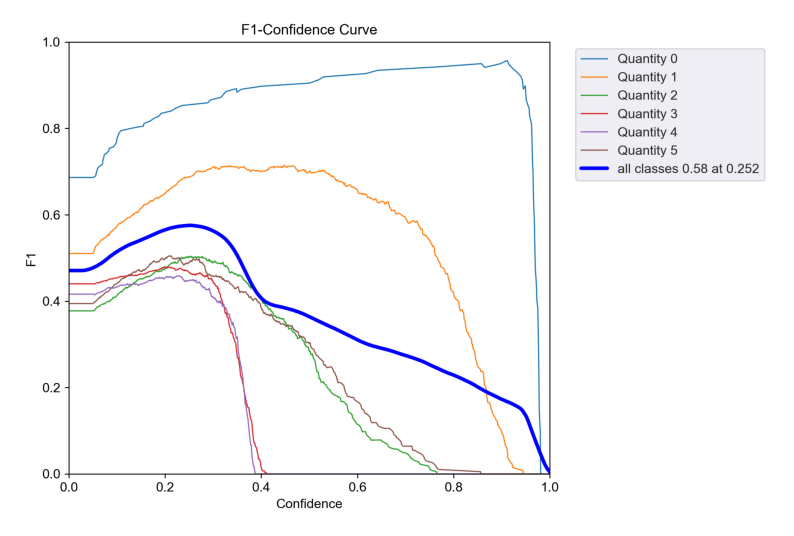

In [44]:
###This plot visualizes the F1 score as a function of different confidence thresholds. 
###The F1 score is a harmonic mean of precision and recall, and it's a useful metric for evaluating the accuracy of a classifier.

from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image_path = '/Users/priyasuresh/DataAnalyticProcess/yolov5/runs/val/exp18/F1_curve.png'  # Update this to the path of the image you want to view
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 10))  # Set the figure size as desired
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


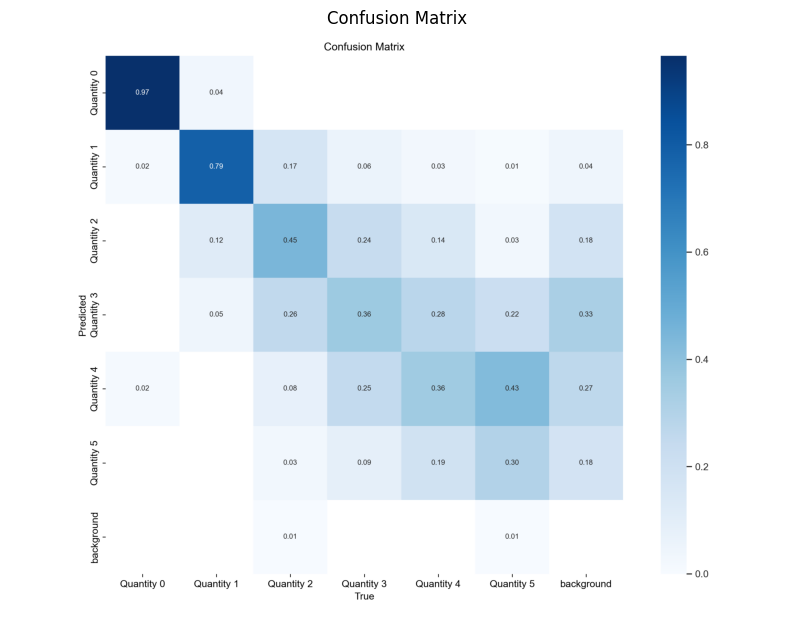

In [45]:
#displaying the confusion matrix

confusion_matrix_path = '/Users/priyasuresh/DataAnalyticProcess/yolov5/runs/val/exp18/confusion_matrix.png'
conf_matrix_image = Image.open(confusion_matrix_path)

plt.figure(figsize=(10, 10))
plt.imshow(conf_matrix_image)
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()


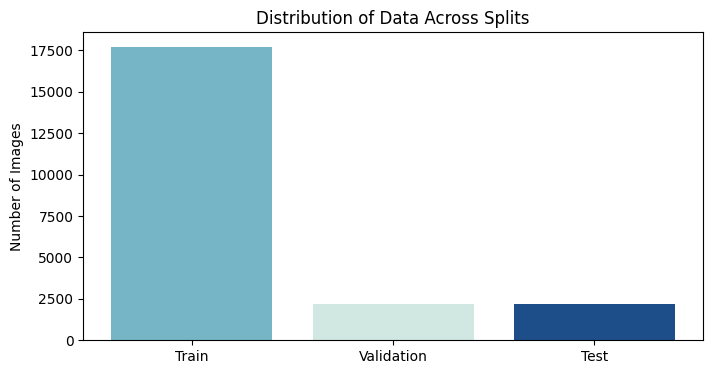

In [46]:
#Visualize Data Splits

import matplotlib.pyplot as plt

# Data split counts
splits = ['Train', 'Validation', 'Test']
counts = [len(train), len(val), len(test)]

plt.figure(figsize=(8, 4))
plt.bar(splits, counts, color=['#76b5c5', '#d1e8e2', '#1d4e89'])
plt.title('Distribution of Data Across Splits')
plt.ylabel('Number of Images')
plt.show()


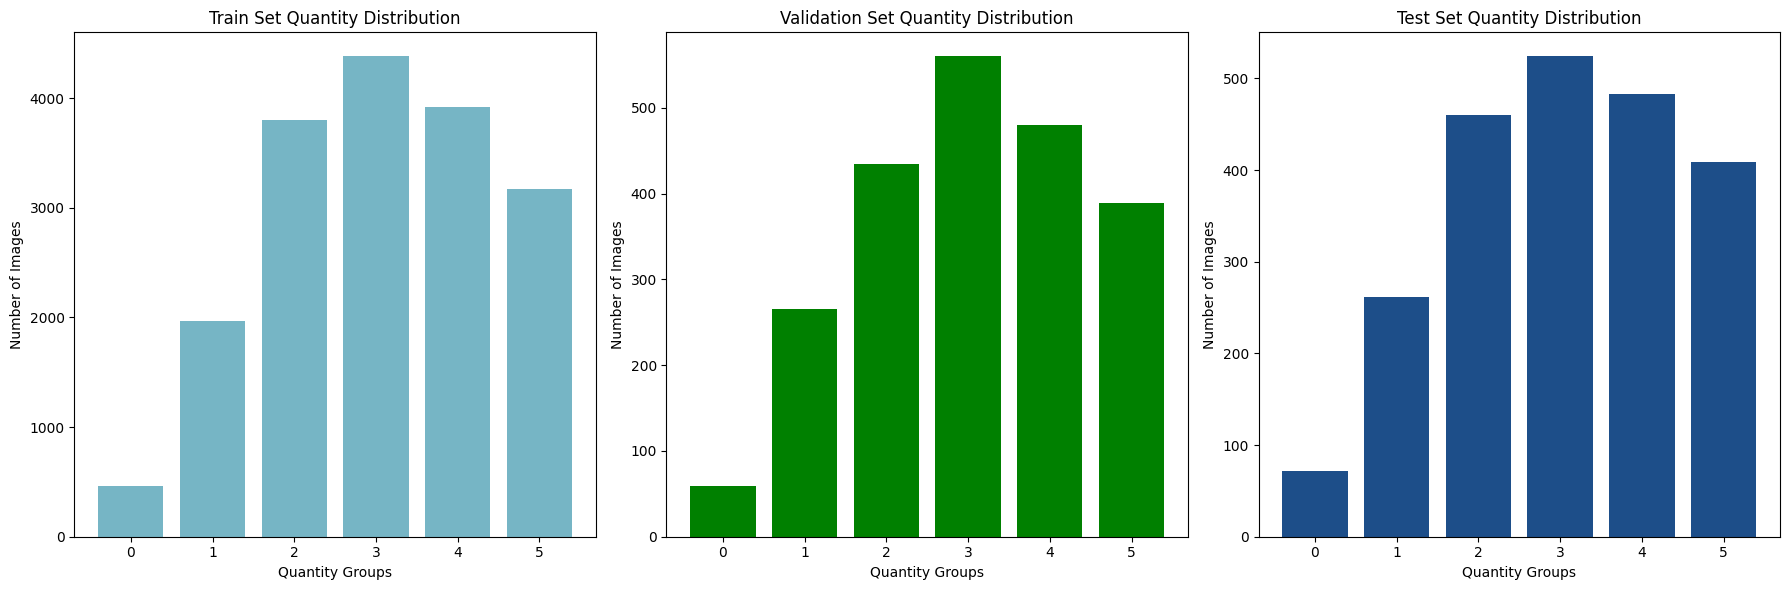

In [47]:
#Visualize Quantity Distribution in Each Split
import numpy as np

def plot_quantity_distribution(data, title, color):
    quantities = data['quantity'].value_counts().sort_index()
    plt.bar(quantities.index, quantities.values, color=color)
    plt.title(title)
    plt.xlabel('Quantity Groups')
    plt.ylabel('Number of Images')
    plt.xticks(np.arange(0, 6))  # Assuming quantity groups from 0 to 5

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_quantity_distribution(train, 'Train Set Quantity Distribution', '#76b5c5')
plt.subplot(1, 3, 2)
plot_quantity_distribution(val, 'Validation Set Quantity Distribution', 'green')
plt.subplot(1, 3, 3)
plot_quantity_distribution(test, 'Test Set Quantity Distribution', '#1d4e89')
plt.tight_layout()
plt.show()


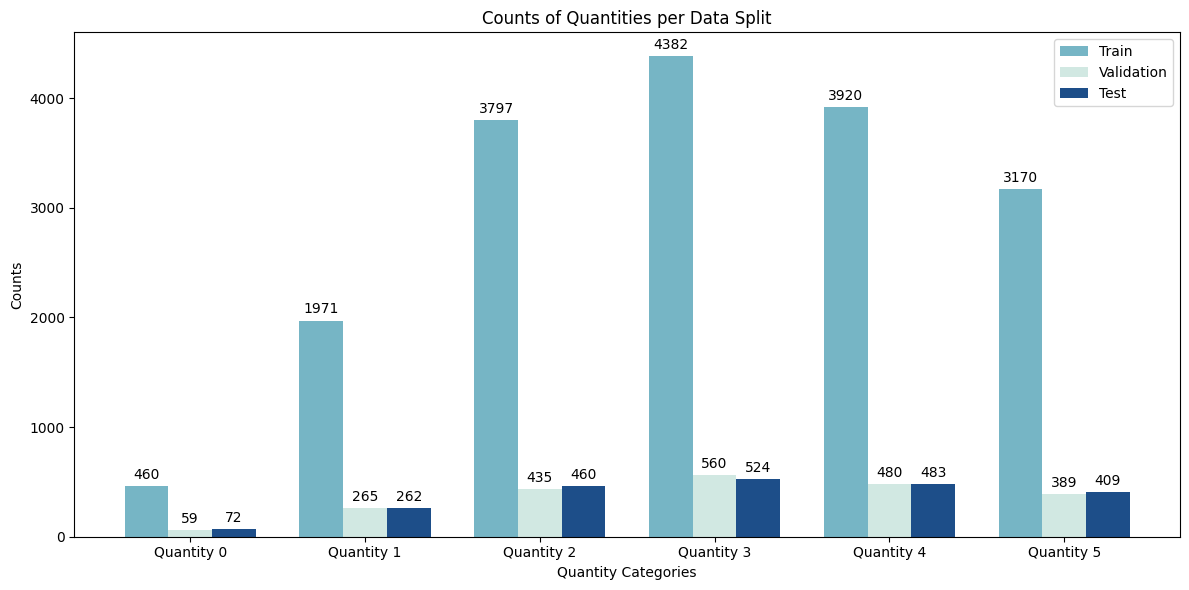

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_quantity_counts', 'val_quantity_counts', 'test_quantity_counts' are dictionaries
# containing the counts of each quantity class for the train, validation, and test sets respectively.
# Example: {0: 312, 1: 1278, 2: 1607, 3: 1605, 4: 1618, 5: 1590}

labels = ['Quantity 0', 'Quantity 1', 'Quantity 2', 'Quantity 3', 'Quantity 4', 'Quantity 5']
train_counts = [train_quantity_counts.get(i, 0) for i in range(6)]
val_counts = [val_quantity_counts.get(i, 0) for i in range(6)]
test_counts = [test_quantity_counts.get(i, 0) for i in range(6)]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, train_counts, width, label='Train', color='#76b5c5')
rects2 = ax.bar(x, val_counts, width, label='Validation', color='#d1e8e2')
rects3 = ax.bar(x + width, test_counts, width, label='Test', color='#1d4e89')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Quantity Categories')
ax.set_ylabel('Counts')
ax.set_title('Counts of Quantities per Data Split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


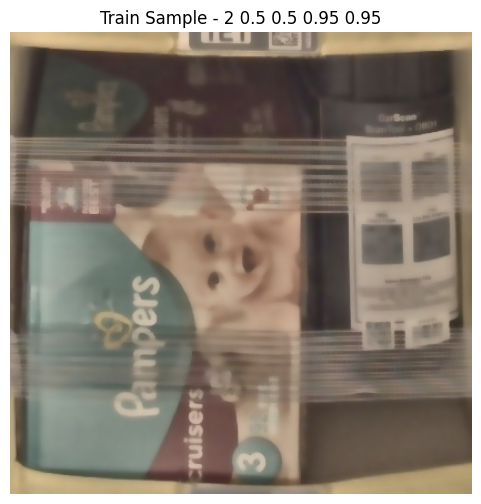

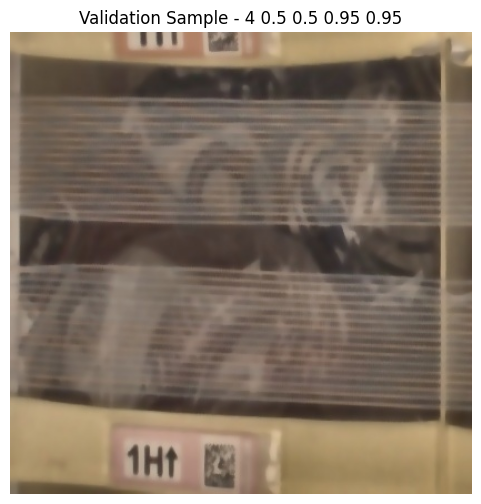

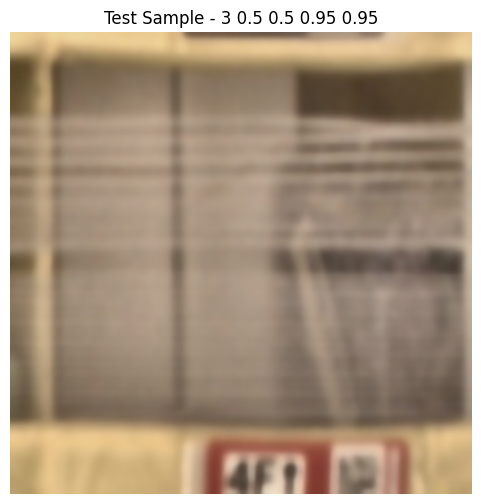

In [55]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def display_sample_image(image_dir, label_dir, title):
    # Get a list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
    # Pick a random image file
    sample_image = random.choice(image_files)
    # Load the image
    img_path = os.path.join(image_dir, sample_image)
    img = Image.open(img_path)
    
    # Load the label
    label_path = os.path.join(label_dir, sample_image.replace('.jpg', '.txt'))
    with open(label_path, 'r') as file:
        label = file.read().strip()
    
    # Display the image and label
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'{title} - {label}')
    plt.axis('off')
    plt.show()

# Assuming the directory paths set up in your previous messages
base_dir = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1'
train_dir = os.path.join(base_dir, 'images/train')
train_label_dir = os.path.join(base_dir, 'labels/train')
val_dir = os.path.join(base_dir, 'images/val')
val_label_dir = os.path.join(base_dir, 'labels/val')
test_dir = os.path.join(base_dir, 'images/test')
test_label_dir = os.path.join(base_dir, 'labels/test')

# Display a sample from each split
display_sample_image(train_dir, train_label_dir, 'Train Sample')
display_sample_image(val_dir, val_label_dir, 'Validation Sample')
display_sample_image(test_dir, test_label_dir, 'Test Sample')


Displaying images with bounding boxes from train split:


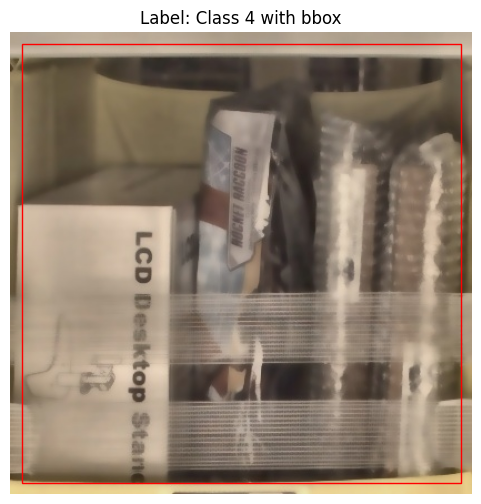

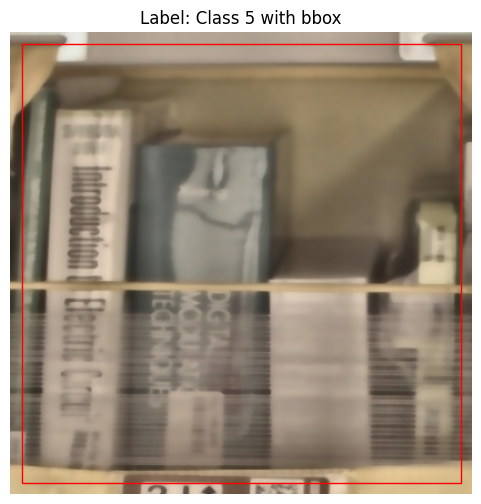

Displaying images with bounding boxes from val split:
Image 00055.jpg not found in /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/images/val
Image 00537.jpg not found in /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/images/val
Displaying images with bounding boxes from test split:
Image 00055.jpg not found in /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/images/test
Image 00537.jpg not found in /Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1/images/test


In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

def display_image_with_bbox(image_dir, label_dir, filenames):
    for filename in filenames:
        # Load the image
        img_path = os.path.join(image_dir, filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure(figsize=(6, 6))
            ax = plt.gca()
            ax.imshow(img)
            plt.axis('off')
        
            # Load and display the label with bounding box
            label_path = os.path.join(label_dir, filename.replace('.jpg', '.txt'))
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    labels = file.readlines()
                
                for label in labels:
                    parts = label.strip().split()
                    class_index = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:])
                    
                    # Convert normalized coordinates to pixel coordinates
                    x_center *= img.width
                    y_center *= img.height
                    width *= img.width
                    height *= img.height
                    
                    # Convert to matplotlib rectangle format
                    rect_x = x_center - width / 2
                    rect_y = y_center - height / 2
                    
                    rect = patches.Rectangle((rect_x, rect_y), width, height, linewidth=1, edgecolor='r', facecolor='none')
                    ax.add_patch(rect)
                
                plt.title(f'Label: Class {class_index} with bbox')
            else:
                plt.title('Label file not found')
        
            plt.show()
        else:
            print(f"Image {filename} not found in {image_dir}")

# Directory paths
base_dir = '/Users/priyasuresh/Documents/Documents_Priya’s MacBook Pro/SPRING2024/Data 270- Data Analyst Process/Project_Data_preprocessing/datasets1'
image_dirs = {
    'train': os.path.join(base_dir, 'images/train'),
    'val': os.path.join(base_dir, 'images/val'),
    'test': os.path.join(base_dir, 'images/test')
}
label_dirs = {
    'train': os.path.join(base_dir, 'labels/train'),
    'val': os.path.join(base_dir, 'labels/val'),
    'test': os.path.join(base_dir, 'labels/test')
}

# Filenames for bounding box display
filenames = [
    '00055.jpg',
    '00537.jpg'
]

# Display images with bounding boxes from each dataset split
for split, image_dir in image_dirs.items():
    print(f"Displaying images with bounding boxes from {split} split:")
    display_image_with_bbox(image_dir, label_dirs[split], filenames)
